<img src='https://drive.google.com/uc?id=1FoiIHxK8gKl3ibwBeruulS_qeg5928oc' width=800>



<img src='https://drive.google.com/uc?id=17uiOygxUR1QvLz1i4e8Vcr_4K5Z1MZsJ' width=800>



<img src='https://drive.google.com/uc?id=1aMmr5BkkG0Zj12-_srd0JW3axcu0OduV' width=800>
<img src='https://drive.google.com/uc?id=1_2wKgT-F-p59yknRxo3YKloizAosKcfX' width=800>
<img src='https://drive.google.com/uc?id=178hij9lUMoBW62QzdJziO5qXVugeAOcJ' width=800>

<img src='https://drive.google.com/uc?id=1X7Pwj8tofehUMcopYYUqVi-SnStM6o1x' width=800>

<img src='https://drive.google.com/uc?id=1xETSzMreZyl5rfAMSg4qGIm2jJNfcz9F' width=800>



## Optimization

Now, we come to our main task of training the model.

If you remember,
- our objective was to find the hyperplane in $d+1$ dimensions
- such that this is very close to the $d+1$ dimensional points.

#### How do we write it as an optimization problem?

#### Geometric Intuition of Minima in Loss function/ Optimization equation

<img src='https://drive.google.com/uc?id=1X7Pwj8tofehUMcopYYUqVi-SnStM6o1x' width=800>


<img src="https://drive.google.com/uc?id=1DY2kyzY1hKV6h8780cTVvgMgNyxhngXP" width=800>

<img src='https://drive.google.com/uc?id=13OZ480BlQX4mF27-Tpr1S-NcxggGF3CT' width=800>



Geometrically, we are trying to finding the global minimal of the loss function

- In 2D, let's think of this like a parabola.
- Our aim is to find the global minimal point of this parabola.


### Solving the optimization equation

<img src='https://drive.google.com/uc?id=1oalHHCm2lzkdfyvQNNdJWIwCM9BLhoyy' width=800>



<img src='https://drive.google.com/uc?id=1t5Hf9HttkkIpRjLCgVmAErIUMzFK3LyR' width=800>



<img src='https://drive.google.com/uc?id=1AZ7HUi8QujSTESPX6Xcz5bygNIFRVt36' width=800>



<img src='https://drive.google.com/uc?id=1hmvE4ypAP5hImKE8ko3CQhjpUH8PyGNI' width=800>



#### How to update the weights now?

<img src='https://drive.google.com/uc?id=1JmZa0MQATa1VnESj23sQSAaM4MU_Ub1w' width=800>


<img src='https://drive.google.com/uc?id=1ed96ikDxQYE9p3S8c1L5nMQE3BXc_ecB' width=800>


**What is the importance of learning rate (α/η)?**

α/η is considered as a step size which when iterated over will reach minima of the cost function.

- Since Learning rate defines the size of a jump or step size.
  - Too small a value -> the updates will happen very slowly.
  - A large value -> it may overshoot the minima.

- Then we have to iterate back again to reach the minimum. At times it results in oscillations back and forth.

- One hack that you can do is we should decrease the value of η as iteration increases. This helps to reach minima more easily and not overshoot.

## Implementation of weights update using gradient descent, and fit function

In [ ]:
import numpy as np
class LinearRegression() :
  def __init__(self, learning_rate=0.01, iterations=5):
    self.learning_rate = learning_rate
    self.iterations = iterations


Next we define our predict function.

It's simply $X*W + b$

In [ ]:
def predict(self, X):
  return np.dot(X, self.W)+self.b

LinearRegression.predict=predict

In [ ]:
def update_weights(self):
  Y_pred = self.predict(self.X)
  # calculate gradients
  dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
  db = - 2*np.sum(self.Y - Y_pred)/self.m

  # update weights
  self.W = self.W - self.learning_rate * dW
  self.b = self.b - self.learning_rate * db

  return(self.W ,self.b)
  return self

LinearRegression.update_weights=update_weights

**Note:**
- Using 1 point of updation is called stochastic gradient descent.
- Whereas if we update the weights after m points, it's called batch gradient descent.

Now finally, since we have all the required functions, </br>
let's code the `fit` function now to fit our model to our data.

In [ ]:
def fit(self, X, Y):
  # no_of_training_examples, no_of_features
  self.m, self.d = X.shape
  # weight initialization
  self.W = np.zeros(self.d)
  self.b = 0
  self.X = X
  self.Y = Y
  self.error_list=[]
  print("initial values of weight = ",self.W,self.b)
  # gradient descent learning
  for i in range(self.iterations):
    self.W,self.b = self.update_weights()
    Y_pred=X.dot(self.W)+self.b
    print("wegihts = ", self.W,"bias = ",self.b,"predicted value = ",Y_pred[0],"actual value =",Y[0])
    error=np.square(np.subtract(Y,Y_pred)).mean()
    self.error_list.append(error)

  return self

LinearRegression.fit=fit

Let's train our model now on our data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1G40LqY-c0KSoCkav3OwSKF6xihnipoWF

Downloading...
From: https://drive.google.com/uc?id=1G40LqY-c0KSoCkav3OwSKF6xihnipoWF
To: /content/Housing.csv
100% 30.0k/30.0k [00:00<00:00, 44.1MB/s]


In [ ]:
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# define X and y
X = df[['area'	,'bedrooms'	,'bathrooms'	,'stories','parking']]
y = df["price"]

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Now X_scaled contains the scaled features


In [ ]:
# new_data = pd.concat([X_scaled, df[["mainroad","guestroom","basement","hotwaterheating","airconditioning"]]], axis=1)

# new_data

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
X[["mainroad","guestroom","basement","hotwaterheating","airconditioning"]]

KeyError: "None of [Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',\n       'airconditioning'],\n      dtype='object')] are in the [columns]"

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

In [ ]:
lr = LinearRegression(iterations=200)
lr.fit(X_train, y_train)

initial values of weight =  [0. 0. 0. 0.] 0
wegihts =  [25786.50258615 40189.62275229 12360.23608563 31206.00642202] bias =  96140.31834862386 predicted value =  116948.1235942157 actual value = 13300000
wegihts =  [50948.63144814 79331.493456   24448.42257323 61631.06993345] bias =  189719.8373777317 predicted value =  230801.77125267716 actual value = 13300000
wegihts =  [ 75502.77617505 117453.13661582  36271.66742889  91295.63691287] bias =  280805.90102149395 predicted value =  341642.3042855125 actual value = 13300000
wegihts =  [ 99464.89559676 154581.3533337   47836.89184668 120219.61648893] bias =  369464.0831707141 predicted value =  449548.9455518461 actual value = 13300000
wegihts =  [122850.5291055  190742.24032185  59150.83515753 148422.39466063] bias =  455758.23419462726 predicted value =  554598.835664375 actual value = 13300000
wegihts =  [145674.80767985 225961.20841608  70220.05960902 175922.84804634] bias =  539750.5262399752 predicted value =  656867.0877167296 ac

In [ ]:
13300000 -  4181374

9118626

In [ ]:
13300000 -  116948

13183052

In [ ]:
lr.predict(X_test)

array([4672154.45961486, 4437773.97495455, 5363555.51135057,
       5185988.0229503 , 6421194.16485887, 5246652.11708873,
       4301434.92748618, 4712203.46770524, 4898670.73568115,
       3947223.70037565, 4463727.19758379, 3939658.88773636,
       4571141.96143133, 4769162.05698935, 5002514.27746266,
       3851106.08095873, 5432657.51021963, 5396768.93703312,
       5364445.48930813, 5279435.70849453, 3939213.89875758,
       3875135.48581296, 5344087.81757577, 4189297.7048331 ,
       5499576.54583381, 4537150.37908283, 4264372.13508942,
       4644248.86110943, 3972143.08318745, 4745132.65213511,
       4582711.67487966, 4916470.29483244, 4663972.23803572,
       5425248.23167517, 5439777.33388015, 4221336.91130541,
       4437027.85885687, 3856445.94870411, 4517125.87503764,
       4283207.26522234, 4840360.29359448, 6148221.03940773,
       4605406.11279755, 4774791.37961868, 4801490.7183456 ,
       5903338.81484817, 6976083.74916516, 5096990.22719388,
       3928712.15885832,

In [ ]:
lr.W

array([1041956.51776968, 1442310.52705868,  563416.40576462,
       1193851.73409138])

In [ ]:
lr.b

3323004.478720607

In [ ]:
lr.error_list

[25513160007326.477,
 24329490066055.22,
 23207157518453.293,
 22142980621401.445,
 21133942683846.688,
 20177183504755.15,
 19269991255219.707,
 18409794781681.875,
 17594156308422.812,
 16820764518611.29,
 16087427994271.238,
 15392068996549.758,
 14732717568632.76,
 14107505944570.807,
 13514663248146.197,
 12952510466735.406,
 12419455685901.564,
 11913989571191.668,
 11434681084314.752,
 10980173421542.629,
 10549180162805.398,
 10140481620551.957,
 9752921378012.758,
 9385403007039.62,
 9036886956207.018,
 8706387600342.594,
 8392970443112.798,
 8095749464723.887,
 7813884607210.504,
 7546579390174.492,
 7293078650206.84,
 7052666397576.7295,
 6824663784104.487,
 6608427176450.769,
 6403346329353.542,
 6208842653628.094,
 6024367574014.241,
 5849400972209.934,
 5683449710672.231,
 5526046232995.85,
 5376747236896.823,
 5235132416034.926,
 5100803267103.831,
 4973381958803.271,
 4852510259483.07,
 4737848520415.452,
 4629074711809.935,
 4525883508834.784,
 4427985425050.939,
 4335

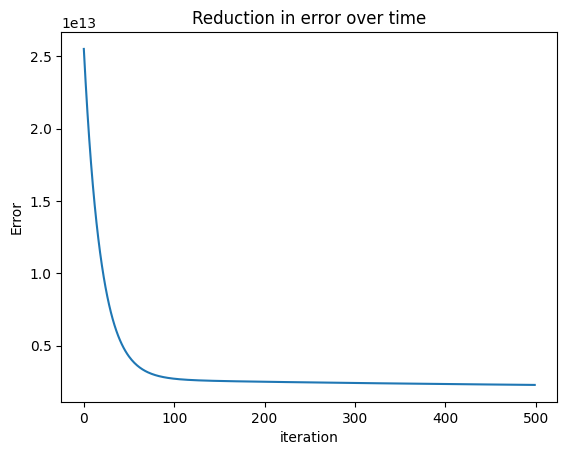

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression as LRM # import my LR model
from sklearn.metrics import mean_squared_error, r2_score # metrics


model = LRM()

print(X_train)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


[[0.18350515 0.4        0.         0.        ]
 [0.25773196 0.4        0.         0.        ]
 [0.08020619 0.6        0.33333333 0.33333333]
 ...
 [0.01278351 0.2        0.         0.        ]
 [0.95876289 0.4        0.         0.        ]
 [0.08453608 0.4        0.         0.33333333]]
Mean Squared Error: 1196779871953.912


In [ ]:
sum(lr.error_list)/len(lr.error_list)

4801946752380.246